In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

descritions for data

https://ffiec.cfpb.gov/documentation/2018/lar-data-fields/

In [97]:
df = pd.read_csv('state_VA.csv', low_memory = False)
# drop columns that are same for all entries
df.drop('state_code',axis = 1,inplace = True)
df.drop('activity_year',axis = 1,inplace = True)

In [98]:
#drop columns that have more then 90% missing values
drop_thresh = df.shape[0]*.9
df = df.dropna(thresh=drop_thresh, how='all', axis='columns').copy()
print(df.shape)
# then remove rows that have empty values
df = df.dropna()
print(df.shape)

(822454, 61)
(737770, 61)


Response is action_taken
1 - Loan originated
2 - Application approved but not accepted
3 - Application denied
4 - Application withdrawn by applicant
5 - File closed for incompleteness
6 - Purchased loan
7 - Preapproval request denied
8 - Preapproval request approved but not accepted

In [22]:
df.describe()

,derived_msa-md,county_code,census_tract,action_taken,purchaser_type,preapproval,loan_type,loan_purpose,lien_status,reverse_mortgage,...,initially_payable_to_institution,aus-1,denial_reason-1,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
count,737770.000000,737770.000000,7.377700e+05,737770.000000,737770.000000,737770.000000,737770.000000,737770.000000,737770.000000,737770.000000,...,737770.000000,737770.000000,737770.000000,737770.000000,737770.000000,737770.000000,737770.000000,737770.000000,737770.000000,737770.000000
mean,48281.651219,51243.265286,5.124358e+10,2.111516,6.952446,1.993834,1.501056,20.763277,1.065531,12.386963,...,11.764372,13.717061,16.856874,5401.164746,34.704131,96618.568389,119.123599,1418.311353,1814.968637,31.467203
std,15602.163689,269.886997,2.697734e+08,1.590461,18.883489,0.078281,0.832933,14.239551,0.247461,106.823541,...,107.717893,107.548851,90.292359,2005.184348,20.467104,21647.070353,37.803906,599.113072,752.482831,14.964354
min,13980.000000,51001.000000,5.100109e+10,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,58100.000000,0.000000,0.000000,0.000000,0.000000
25%,44420.000000,51059.000000,5.105948e+10,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,10.000000,3950.000000,17.880000,78800.000000,92.000000,1008.000000,1316.000000,21.000000
50%,47894.000000,51107.000000,5.110761e+10,1.000000,1.000000,2.000000,1.000000,31.000000,1.000000,2.000000,...,1.000000,2.000000,10.000000,5280.000000,32.070000,84900.000000,116.000000,1360.000000,1744.000000,30.000000
75%,47894.000000,51199.000000,5.119905e+10,3.000000,3.000000,2.000000,2.000000,31.000000,1.000000,2.000000,...,1.000000,6.000000,10.000000,6618.000000,47.880000,118700.000000,143.000000,1781.000000,2236.000000,40.000000
max,99999.000000,51840.000000,5.184000e+10,8.000000,72.000000,2.000000,4.000000,32.000000,2.000000,1111.000000,...,1111.000000,1111.000000,1111.000000,15068.000000,100.000000,118700.000000,315.000000,3985.000000,4881.000000,76.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737770 entries, 0 to 822453
Data columns (total 59 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   lei                                       737770 non-null  object 
 1   derived_msa-md                            737770 non-null  int64  
 2   county_code                               737770 non-null  float64
 3   census_tract                              737770 non-null  float64
 4   conforming_loan_limit                     737770 non-null  object 
 5   derived_loan_product_type                 737770 non-null  object 
 6   derived_dwelling_category                 737770 non-null  object 
 7   derived_ethnicity                         737770 non-null  object 
 8   derived_race                              737770 non-null  object 
 9   derived_sex                               737770 non-null  object 
 10  action_taken        

In [24]:
unique_counts = pd.DataFrame.from_records([(col, df[col].nunique()) for col in df.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])

1 - Loan originated  (means it was accpected and taken)

2 - Application approved but not accepted

3 - Application denied

4 - Application withdrawn by applicant

5 - File closed for incompleteness

6 - Purchased loan

7 - Preapproval request denied

8 - Preapproval request approved but not accepted

In [132]:
lookup_action_taken = {1:'Loan originated', 2: 'Application approved but not accepted',3:'Application denied',
            4:'Application withdrawn by applicant',5:'File closed for incompleteness',6:'Purchased loan',7:'Preapproval request denied',8:"Preapproval request approved but not accepted"}
print(df.action_taken.map(lookup_action_taken).value_counts())
print(df.action_taken.value_counts())

Loan originated                                  464207
Application withdrawn by applicant               107258
Application denied                                76131
File closed for incompleteness                    39462
Purchased loan                                    34148
Application approved but not accepted             16401
Preapproval request denied                          123
Preapproval request approved but not accepted        40
Name: action_taken, dtype: int64
1    464207
4    107258
3     76131
5     39462
6     34148
2     16401
7       123
8        40
Name: action_taken, dtype: int64


In [133]:
#create a new dataframe where the only values are those that got accepted or denied
dfd = df[(df['action_taken']==1) | (df['action_taken']==3)]
dfd['derived_race'].value_counts()

White                                        329808
Race Not Available                            96335
Black or African American                     52443
Asian                                         44547
Joint                                         13254
American Indian or Alaska Native               1701
2 or more minority races                       1166
Native Hawaiian or Other Pacific Islander      1084
Name: derived_race, dtype: int64

In [134]:
dfd =dfd[(dfd['derived_race']!='Race Not Available')]
rows = dfd[(dfd['derived_race']=='American Indian or Alaska Native') | 
    (dfd['derived_race']=='2 or more minority races') |
    (dfd['derived_race']=='Native Hawaiian or Other Pacific Islander') |
    (dfd['derived_race']=='Joint')].index
dfd.loc[rows,'derived_race']='other'
dfd.loc[dfd['derived_race']=='Black or African American','derived_race'] = 'Black'
racial_counts = dfd['derived_race'].value_counts()
racial_counts

White    329808
Black     52443
Asian     44547
other     17205
Name: derived_race, dtype: int64

In [135]:
dfd['counter'] = 1
dfd.loc[dfd['derived_race']=='other','action_taken'].value_counts()

1    14850
3     2355
Name: action_taken, dtype: int64

In [136]:
race = pd.DataFrame(dfd['derived_race'].value_counts(normalize=True)*100).reset_index()
race

,index,derived_race
0,White,74.280579
1,Black,11.811407
2,Asian,10.033040
3,other,3.874974


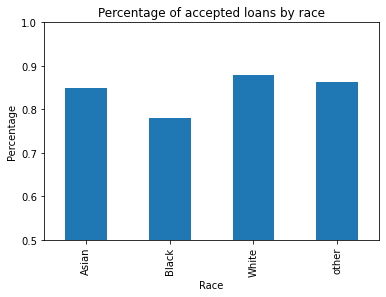

<Figure size 432x288 with 0 Axes>

In [161]:
s = (dfd.pivot_table(columns='action_taken', index='derived_race', values='counter', aggfunc='count'))
s['% Accepted'] = (s[1]/(s[1]+s[3]))
ax = s['% Accepted'].plot.bar()
plt.ylim(0.5,1)
plt.title("Percentage of accepted loans by race")
plt.ylabel('Percentage')
plt.xlabel('Race')
plt.show()
plt.savefig("plots/accepted_by_race.png",dpi=800)